# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Ana Sofia Preto Oliveira
## Number: 39275

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q3.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve


<hr style="border:2px solid black"> </hr>

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsVerySmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 500 images of cats and 500 images of dogs
## The test data consists of 250 images of cats and 250 images of dogs
## The images have various sizes

# Questions:
# Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
# Note that you should be aware of the computational capacity of your system.  Choose the pre-trained network and parameter values such as the input image size or batch training size accordingly.
## 1.  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN. 
## 2.  Using the $\texttt{ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation.
## 3.  Train the network for at least 15 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the $\texttt{steps\_per\_epoch}$ and the $\texttt{validation\_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.
## 4. Find the operational point of the classifier in Question 3. Calibrate the classifier in order to have approximately the same number of false positives an false negatives. Plot the ROC curve of this classifier with the test data. Include in this plot the operational points of the classifier before and after calibration

## 1.

In [10]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

bSize=10 
ISize=(96,96)


cnnBase=MobileNetV2(weights="imagenet",include_top=False,input_shape=ISize+(3,))

cnnBase.trainable=False

cnn=keras.models.Sequential()
cnn.add(cnnBase)
cnn.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128,activation="relu"))
cnn.add(keras.layers.Dropout(.4))
cnn.add(keras.layers.Dense(2, activation="softmax"))

cnn.build(input_shape=(None,)+ISize+(3,))
cnn.compile(optimizer=keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 1, 1, 1280)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


## 2.

In [36]:
dataDir='CatsDogsVerySmall/CatsDogsVerySmall/'

dataGen=ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=20,width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,zoom_range=0.3,
                        horizontal_flip=True,fill_mode='nearest')

trainGen=dataGen.flow_from_directory(directory=dataDir+'train/',target_size=ISize,
                                     class_mode='categorical',batch_size=bSize)

testGen=dataGen.flow_from_directory(directory=dataDir+'test/',target_size=ISize,
                                    class_mode='categorical',batch_size=bSize,shuffle=False)


Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [67]:
for I, c in trainGen: 
    break
print(I.shape, c.shape)

gato = (I[np.where(c[:,0]==1)][0] + 1)/2*255.0
cao = (I[np.where(c[:,1]==1)][0] + 1)/2*255.0

print(gato.shape, cao.shape)    


(10, 96, 96, 3) (10, 2)
(96, 96, 3) (96, 96, 3)


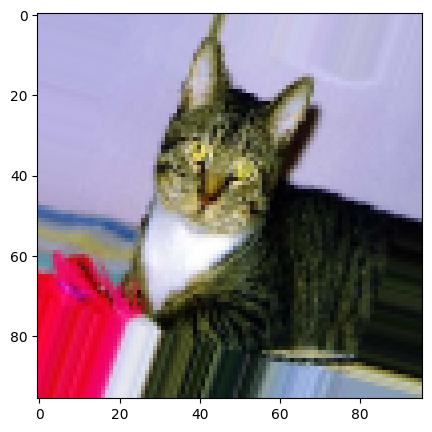

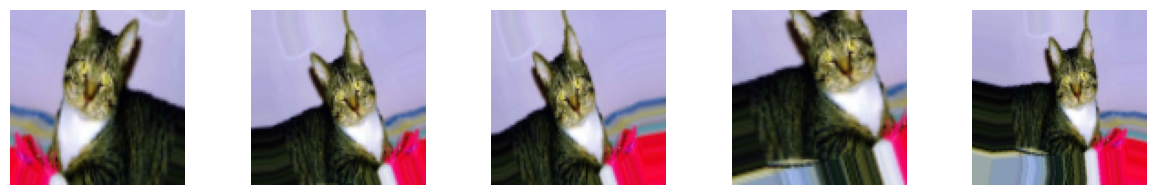

In [73]:
B=gato
plt.figure(figsize=(5,5))
C=B-B.min()
C=C/C.max()*255
plt.imshow(C.astype('uint8'))

B=B[np.newaxis,:,:,:]
gen2=dataGen.flow(B)

plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(2,5,i+1)
    #A=gen2.next()
    for A in gen2:
        break
    A=A.squeeze()
    A=A-A.min()
    A=A/A.max()*255
    plt.imshow(A.astype('uint8'))
    plt.axis('off')

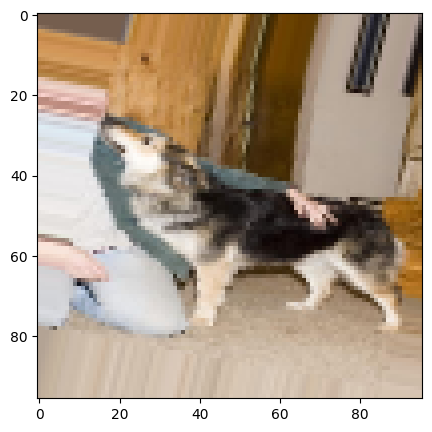

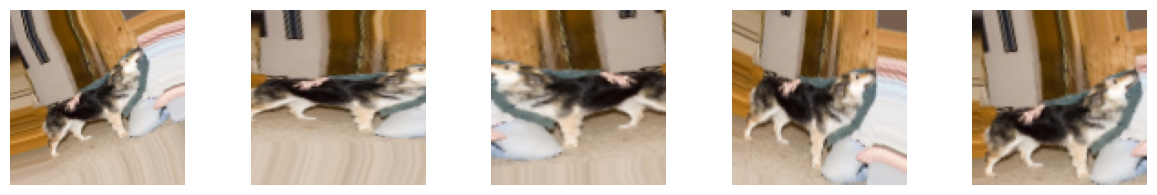

In [74]:
B=cao
plt.figure(figsize=(5,5))
C=B-B.min()
C=C/C.max()*255
plt.imshow(C.astype('uint8'))

B=B[np.newaxis,:,:,:]
gen2=dataGen.flow(B)

plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(2,5,i+1)
    #A=gen2.next()
    for A in gen2:
        break
    A=A.squeeze()
    A=A-A.min()
    A=A/A.max()*255
    plt.imshow(A.astype('uint8'))
    plt.axis('off')

## 3.

In [79]:
ePochs=15
speTrain=40
speValid=20
train = cnn.fit(trainGen,steps_per_epoch=speTrain, validation_data=trainGen,validation_steps=speValid,epochs=ePochs)

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9472 - loss: 0.1549 - val_accuracy: 0.9550 - val_loss: 0.1039
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9592 - loss: 0.0934 - val_accuracy: 0.9800 - val_loss: 0.0546
Epoch 3/15
20/40 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9726 - loss: 0.0605

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9738 - loss: 0.0527 - val_accuracy: 0.9950 - val_loss: 0.0281
Epoch 4/15
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9812 - loss: 0.0682 - val_accuracy: 0.9500 - val_loss: 0.1400
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9551 - loss: 0.1494 - val_accuracy: 0.9450 - val_loss: 0.1164
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9542 - loss: 0.0985 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9908 - loss: 0.0495 - val_accuracy: 0.9700 - val_loss: 0.0801
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9672 - loss: 0.0820 - val_accuracy: 0.9850 - val_loss: 0.0610
Epoch 9/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9390 - loss: 0.0810 - val_accuracy: 0.9700 - val_loss: 0.0808
Epoch 10/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9529 - loss: 0.1140 - val_accuracy: 0

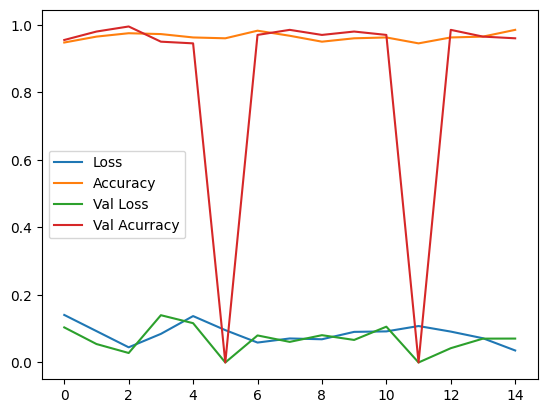

In [80]:
h = train.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Acurracy')
plt.legend()
plt.show()

In [121]:
testGen.reset()
y=np.array([])
ye=np.array([])
c=0
for I,Y in testGen:
    y=np.hstack((y,np.argmax(Y,axis=1)))
    Ye=cnn.predict(I)
    ye=np.hstack((ye,np.argmax(Ye,axis=1)))
    c+=1 
    #print(c)
    if c>=50: #because total nº of test examples=500 and batchSize of the generator is 10
        break
    
    #Y_pred = cnn.predict(testGen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

[[227  23]
 [  6 244]]
Número total de erros (em 29): 500


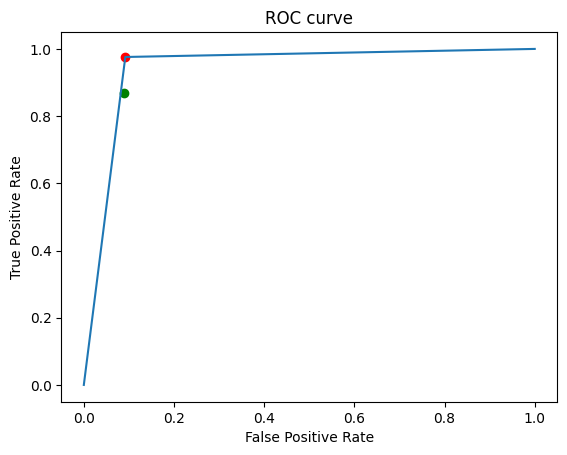

In [122]:
cm = confusion_matrix(y, ye)
print(cm)
print('Número total de erros (em %d): %d'%(np.sum(y!=ye),y.shape[0]))

fp = cm[0, 1] / (cm[0, 1] + cm[0, 0])
tp = cm[1, 1] / (cm[1, 1] + cm[1, 0])

fpr, tpr, thresholds = roc_curve(y, ye)
plt.plot(fpr, tpr)
plt.scatter(fp, tp, color='red')
plt.scatter(0.09, 0.87, color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


## 4.

In [ ]:
#
# Find the operational point of the classifier in Question 3. Calibrate the classifier in order to have approximately the same number of false positives an false negatives. Plot the ROC curve of this classifier with the test data. Include in this plot the operational points of the classifier before and after calibration

